# Análise de dados da Mega-Sena
### Usando conhecimentos de Estatística para validar comportamentos da Mega-Sena
##### Elaborado por Rogério Silva 

## Objetivo

A Mega-Sena é um dos diversos sorteios disponibilizados pela Caixa, realiza concursos desde 1996 e paga milhões de reais para o jogador que acertar a sequência de seis números dentre as 60 opções disponíveis. O objetivo deste material é verificar se os conceitos de Estatística são observados na loteria da Mega-Sena.

Para isso, é valido relembrar os conceitos matemáticos que gostaríamos de validar e, na sequência, compará-los com os números da Mega que saíram ao longo dos anos.

Link da Mega-Sena: https://loterias.caixa.gov.br/Paginas/Mega-Sena.aspx

## Conceitos básicos

### Estatística

Estatística é a ciência que estuda os métodos de coleta, análise, organização, descrição, interpretação e apresentação de dados experimentais. Esses dados são obtidos com o intuito de responder problemas do mundo real.

Áreas da estatística:
1. Estatística descritiva: voltada para a organização e descrição dos dados.
2. Probabilidade: útil para avaliar situações que envolvem o acaso.
3. Inferência: refere-se à analise e interpretação dos dados.

### Tipos de dados estatísticos

Existem uma variedade de dados que são analisados na Estatística, para o nosso estudo focaremos nos dados **QUANTITATIVOS** e **DISCRETOS**. 

![tipos_dados](https://analisemacro.com.br/wp-content/uploads/2023/05/tipos_variaveis.png)

### Teorema do limite central

texto

### Regras da Mega-Sena

Para o sorteio dos 6 números da Mega-Sena é utilizado 1 globo, carregado com bolas numeradas de 01 a 60. Os globos utilizados são fabricados em acrílico, favorecendo a transparência do funcionamento, embaralhamento e sorteio das bolas que são coloridas e cada terminação possui uma cor, para melhor identificação (número 1 vermelhas, número 2 amarelas, número 3 verdes, número 4 marrons, número 5 azuis, número 6 rosas, número 7 pretas, número 8 cinzas, número 9 laranjas e as terminadas em 0 (zero) são brancas).

Ao final do sorteio, 2 voluntários representantes do público, alfabetizados, maiores de idade, munidos de documento de identificação, apresentando evidentes condições físicas e psíquicas, que não sejam empregados da CAIXA ou Empresários Lotéricos, são responsáveis pela validação de todos os procedimentos dos sorteios.

Assista um [vídeo do sorteio](https://www.youtube.com/watch?v=Q3vCc_-zRhA).

## Simulação de sorteios da Mega-Sena

A partir dos conceitos destacados no tópico anterior, utilizaremos o Python como ferramenta de simulação de n jogos da Mega-Sena. Utilizaremos as bibliotecas `random` e `numpy` para gerar os números aleatórios de cada sorteio.

In [1]:
import random 
import numpy as np

numeros = np.array(range(1,61))
print(f'Este são os números possíveis para o sorteio: \n{numeros}')

Este são os números possíveis para o sorteio: 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]


In [2]:
menor_num = min(numeros)
maior_num = max(numeros)
contagem_num = len(numeros)
soma_num = sum(numeros)
media_num = np.mean(numeros)
std_num = np.std(numeros)
var_num = np.var(numeros)

print(f'A simulação contará com {contagem_num} números sequenciais, a partir de {menor_num} até {maior_num}.')
print(f'A média do valores possíveis é {media_num :.2f}, o desvio padrão é {std_num :.2f} e a variância é {var_num:.2f}')

A simulação contará com 60 números sequenciais, a partir de 1 até 60.
A média do valores possíveis é 30.50, o desvio padrão é 17.32 e a variância é 299.92


In [ ]:
import plotly.graph_objects as go

fig_ = go.Figure()
fig_.add_trace(go.Histogram(x=numeros, nbinsx=60))
fig_.update_layout(title_text="Mais uma forma de mostrar que todos os números de 1 a 60 estão listados e só existe uma ocorrência de cada", showlegend=False)
fig_.show()

Utilizando as mesmas bibliotecas, conseguimos simular um sorteio sem repetições.

In [4]:
sorted(random.sample(list(numeros), 6))

[20, 26, 38, 47, 53, 55]

Agora, vamos simular um número crescente de sorteios e avaliar seu comportamento na sequência.

In [5]:
def simular_sorteios(lista, num, qtd_sorteios):
    sorteios = []
    soma_num = []
    media_num = []
    std_num = []
    for i in range(qtd_sorteios):
        numeros_sorteados = sorted(random.sample(lista, num))
        sorteios.extend(numeros_sorteados)
        soma_num.append(np.sum(numeros_sorteados))
        media_num.append(np.mean(numeros_sorteados))
        std_num.append(np.std(numeros_sorteados))
    return sorteios, soma_num, media_num, std_num

In [6]:
sorteio10, soma10, media10, std10 = simular_sorteios(list(numeros), 6, 10)
sorteio100, soma100, media100, std100 = simular_sorteios(list(numeros), 6, 100)
sorteio1000, soma1000, media1000, std1000 = simular_sorteios(list(numeros), 6, 1000)
sorteio10000, soma10000, media10000, std10000 = simular_sorteios(list(numeros), 6, 10000)
sorteio100000, soma100000, media100000, std100000 = simular_sorteios(list(numeros), 6, 100000)
sorteio1000000, soma1000000, media1000000, std1000000 = simular_sorteios(list(numeros), 6, 1000000)

In [7]:
experimentos = [sorteio10, sorteio100, sorteio1000, sorteio10000, sorteio100000, sorteio1000000]

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

titulos = [
    '10 sorteios', '10.000 sorteios', 
    '100 sorteios', '100.000 sorteios', 
    '1.000 sorteios', '1.000.000 sorteios'
    ]
fig = make_subplots(rows=3, cols=2, subplot_titles=titulos)
for exp in enumerate(experimentos):
    linha = (exp[0]%3) + 1
    coluna = (exp[0]//3) + 1
    fig.add_trace(go.Histogram(x=exp[1], nbinsx=60),row=linha, col=coluna)

fig.update_layout(height=600, width=950, title_text="Simulação crescente de sorteio da Mega-Sena", showlegend=False)
fig.show()

A medida que crescemos a quantidade de jogos, mais uniforme fica a distribuição. Logo, não existe maior probabilidade de um grupo de números ser escolhido, a probabilidade é igual para todas 60 opções da cartela.

#### Coleta dos dados brutos

Não são necessários grandes esforços para a coleta das informações, pois a própria Caixa disponibiliza os dados dos sorteios no site, oferecendo inclusive um link para baixar em formato Excel o histórico completo dos resultados.

Caso seja do interesse automatizar essa etapa, fica como sugestão o uso da biblioteca Selenium para baixar o arquivo e salvar no local adequado.

In [9]:
import pandas as pd

df_ms = pd.read_excel('Mega-Sena.xlsx')

In [10]:
df_ms.head()

,Concurso,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores 6 acertos,Cidade / UF,Rateio 6 acertos,Ganhadores 5 acertos,Rateio 5 acertos,Ganhadores 4 acertos,Rateio 4 acertos,Acumulado 6 acertos,Arrecadação Total,Estimativa prêmio,Acumulado Sorteio Especial Mega da Virada,Observação
0,1,11/03/1996,4,5,30,33,41,52,0,NaN,"R$0,00",17,"R$39.158,92",2016,"R$330,21","R$1.714.650,23","R$0,00","R$0,00","R$0,00",NaN
1,2,18/03/1996,9,37,39,41,43,49,1,PR,"R$2.307.162,23",65,"R$14.424,02",4488,"R$208,91","R$0,00","R$0,00","R$0,00","R$0,00",NaN
2,3,25/03/1996,10,11,29,30,36,47,2,RN; \nSP,"R$391.192,51",62,"R$10.515,93",4261,"R$153,01","R$0,00","R$0,00","R$0,00","R$0,00",NaN
3,4,01/04/1996,1,5,6,27,42,59,0,NaN,"R$0,00",39,"R$15.322,24",3311,"R$180,48","R$717.080,75","R$0,00","R$0,00","R$0,00",NaN
4,5,08/04/1996,1,2,6,16,19,46,0,NaN,"R$0,00",98,"R$5.318,10",5399,"R$96,53","R$1.342.488,85","R$0,00","R$0,00","R$0,00",NaN


#### Dicionário de dados

Colunas:

- Concurso: número sequencial que identifica o concurso
- Data do Sorteio: data da realização do concurso
- Bola1, Bola2, Bola3, Bola4, Bola5, Bola6: números sorteados em ordem crescente
- Ganhadores 6 acertos: número de jogares que acertaram os seis números do sorteio
- Cidade/UF: Localidade onde o jogador vencedor jogou
- Rateio 6 acertos

In [11]:
(1/60)+(1/59)+(1/58)+(1/57)+(1/56)+(1/55)

0.10444001920746823

In [12]:
250/2654

0.09419743782969103

#### Tratamento dos dados 

A base disponibilizada é bem confiável e não consta valores acidentais ou valores nulos no dataset já que existe um compromisso do processo ser auditável.

Ufa! Essa etapa será basicamente transformar os dados para o tipo ideal.

In [13]:
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Concurso                                   2654 non-null   int64 
 1   Data do Sorteio                            2654 non-null   object
 2   Bola1                                      2654 non-null   int64 
 3   Bola2                                      2654 non-null   int64 
 4   Bola3                                      2654 non-null   int64 
 5   Bola4                                      2654 non-null   int64 
 6   Bola5                                      2654 non-null   int64 
 7   Bola6                                      2654 non-null   int64 
 8   Ganhadores 6 acertos                       2654 non-null   int64 
 9   Cidade / UF                                577 non-null    object
 10  Rateio 6 acertos                    

In [14]:
df1 = df_ms[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].melt()

<Axes: >

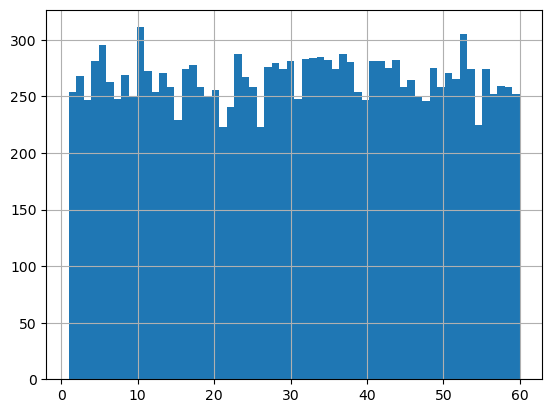

In [15]:
df1['value'].hist(bins=60)

In [16]:
df1[['value']].nunique()

value    60
dtype: int64

In [17]:
df_ms['media'] = df_ms[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].apply(lambda x: sum(x)/6, axis=1)

array([[<Axes: title={'center': 'media'}>]], dtype=object)

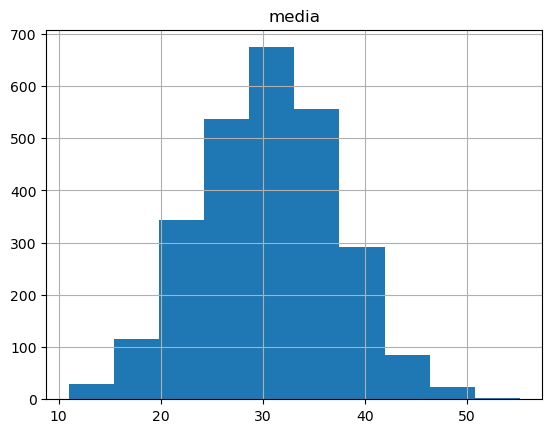

In [18]:
df_ms[['media']].hist()

In [19]:
df_ms['soma'] = df_ms[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].apply(lambda x: sum(x), axis=1)

array([[<Axes: title={'center': 'soma'}>]], dtype=object)

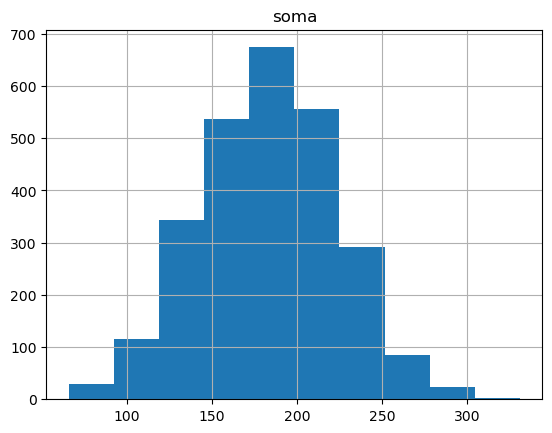

In [20]:
df_ms[['soma']].hist()